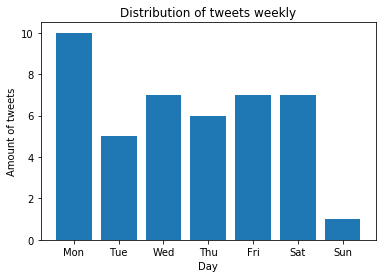

In [83]:

import pandas as  pd
import csv
import operator
import numpy as np
%matplotlib notebook
%matplotlib inline
import re
import json
import matplotlib as mpl   
import matplotlib.pyplot as plt
from __future__ import print_function, division
import nltk
#To install nltk corpus for stop words, un-comment and run the next line.
#nltk.download()
from nltk.corpus import stopwords

data = []
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

##load data
with open('geocoordinatedata.csv', 'rt', encoding='utf8') as csvfile:
    csv.reader(csvfile, delimiter=' ', quotechar='|')
    sort = sorted(csvfile, key=operator.itemgetter(0))

    for eachline in sort:
        t = eachline.split('"created_at":"')[1].split('","contributors_enabled":')[0]
        data.append(t)
#         print(t[0:3], '\n')


## Distribution of days(Mon-Sun)
dataByDay = {}
dataByDay['Mon'] = []
dataByDay['Tue'] = []
dataByDay['Wed'] = []
dataByDay['Thu'] = []
dataByDay['Fri'] = []
dataByDay['Sat'] = []
dataByDay['Sun'] = []

for d in data:
    day = d[0:3]
    if day not in dataByDay:
        dataByDay[day] = []
    dataByDay[day].append(d)

dataByday = []
for key, value in dataByDay.items():
    dataByday.append(len(value))
    
# print(dataByday)
    
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(np.array(range(7)), dataByday)

ax.set_title("Distribution of tweets weekly")
ax.set_xlabel('Day')
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(days)
ax.set_ylabel('Amount of tweets')


# print(data[0][11:13], data[0][14:16])
# dummy = data[0][11:13] + data[0][14:15]
# print(int(dummy))




In [1]:

## Tweet distrubution of time period(10mins)
dataPer10Min = {}
for day in days:
    dataPer10Min[day] = {}
    for i in range(24):
        for j in range(6):
            dataPer10Min[day]["%03d"%(i * 10 + j)] = []

for key, value in dataByDay.items():
    for v in value:
        time = "%03d"%int(v[11:13] + v[14:15])
        day = v[0:3]

        if time not in dataPer10Min[day]:
            dataPer10Min[day][time] = []
        dataPer10Min[day][time].append(v)    


    
# dataPer10min = []
# for key, value in dataPer10Min.items():
#     dataB.append(len(value))
    
fig = plt.figure(figsize=(30,50))
timePeriods = []
for i in range(24):
    for j in range(6):
        time = "%02d"%i + ':' + "%02d"%(j * 10)
        timePeriods.append(time)
        
for i in range(7):
    ax = fig.add_subplot(7,1,i + 1)

    dataPer10min = []
    for key, value in dataPer10Min[days[i]].items():
        dataPer10min.append(len(value))
        
    ax.bar(np.array(range(24*6)), dataPer10min)
    
    title = "Distribution of tweets of " + days[i]
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('Time Period', fontsize=20)
    ax.set_xticks(np.array(range(24*6)))
    ax.set_xticklabels(timePeriods, rotation="vertical", fontsize=12)
    ax.set_ylabel('Amount of tweets',fontsize=20)
    
fig.tight_layout()
    

NameError: name 'days' is not defined

In [ ]:
# For a better understanding, uncomment the print() function along the code and see the results.

import pandas as  pd
import csv
import operator
import numpy as np
%matplotlib notebook
%matplotlib inline
import re
import json
import matplotlib as mpl   
import matplotlib.pyplot as plt
from __future__ import print_function, division
import nltk
#To install nltk corpus for stop words, un-comment and run the next line.
# nltk.download()
from nltk.corpus import stopwords


N = 10 
final_set, a, b = [], [], []
ab = np.empty((43,2))

with open('geocoordinatedata.csv', 'rt', encoding='utf8') as csvfile:
    csv.reader(csvfile, delimiter=' ', quotechar='|')
    sort = sorted(csvfile, key=operator.itemgetter(0))
    
#Reading each line of the file, working on coordinates and creating a "final_set" list that we we will use later
#for processing words.
    for eachline in sort:
        coordinates = eachline.split('":{"type":"Point","coordinates":')[1].split('},"source')[0]
        filtered_tweets = list(filter(bool, re.split('[^a-z]', json.loads(eachline)["text"].lower())))
        final_set.append(filtered_tweets)
        x = (coordinates.split('[')[1].split(',')[0])
        y = (coordinates.split(',')[1].split(']')[0])
        x_float, y_float = float(x), float(y)
        a.append(x_float)
        b.append(y_float)
        a_array, b_array = np.asarray(a), np.asarray(b)
    final = np.stack((a_array, b_array), axis=1)
    #print(final)    

    #In this part we use the "final_set" to process our tweets' data.
    final_set_string = ''.join(str(e) for e in final_set)
    wordList = re.sub("[^\w]", " ",  final_set_string).split()
    #print(wordList)
    #We remove stop words and 'https' which is appearing too often in tweets.
    filteredText = [word for word in wordList if word not in stopwords.words('english') if len(word)>3 if word!='https']      
    #print(filteredText)
    #Creating a dictionary "wordDict" where each word has a key value according to how many times this word appears in the tweets
    results_union = set().union(*final_set)
    wordDict = dict.fromkeys(results_union, 0)
    for word in filteredText:
        wordDict[word] += 1 
    #print(wordDict)
    #We sort the dictionary and choose the top N=10 words with respect to the key value.    
    topwords = dict(sorted(wordDict.items(), key=operator.itemgetter(1), reverse=True)[:(N-len(wordDict))])
    print(topwords)
    #Creating a DataFrame to show the top N=10 words.
    df = pd.DataFrame({'Words':[*topwords]}) 
    #print(df)
    
    #Making the Plot for Tweet Coordinates.
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(final[:,0], final[:,1], label='Exact Tweet Coordinates')
    ax.set_xlabel("Longitude: x")
    ax.set_ylabel("Latitude: y")
    ax.set_title("Tweet Location")
    ax.legend()
    ax.grid("on")
    
    #Making the Plot for top N words of our tweet corpus.
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(range(len(topwords)), topwords.values(), align="center")
    plt.xticks(range(len(topwords)), list(topwords.keys()))
    ax.set_xlabel("Popular Tweet words.")
    ax.set_ylabel("Count")
    ax.set_title("Top 10 Words")
    
    